<a href="https://colab.research.google.com/github/Minal309/WALMART_CASESTUDY_CONFIDENCE_INTERVAL_CLT/blob/main/Walmart_Casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##WALMART CASE STUDY : CONFIDENCE INTERVAL AND CLT

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import norm

In [ ]:
#Read the csv into google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
walmart_df = pd.read_csv('/content/drive/My Drive/walmart_data.csv')
walmart_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
walmart_df.shape

(550068, 10)

###Checking for null values

In [ ]:
walmart_df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

<Axes: ylabel='Purchase'>

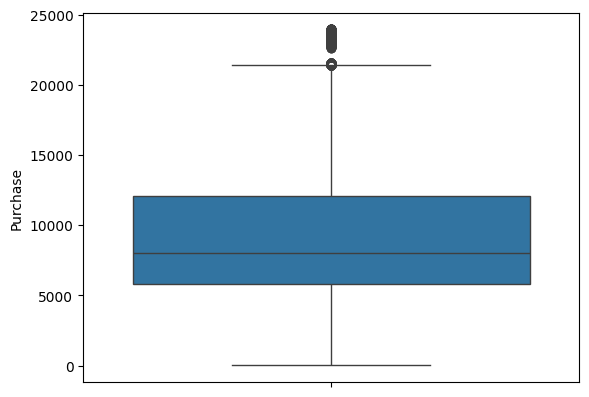

In [ ]:
sns.boxplot( y='Purchase', data = walmart_df)

<Axes: xlabel='Gender', ylabel='Purchase'>

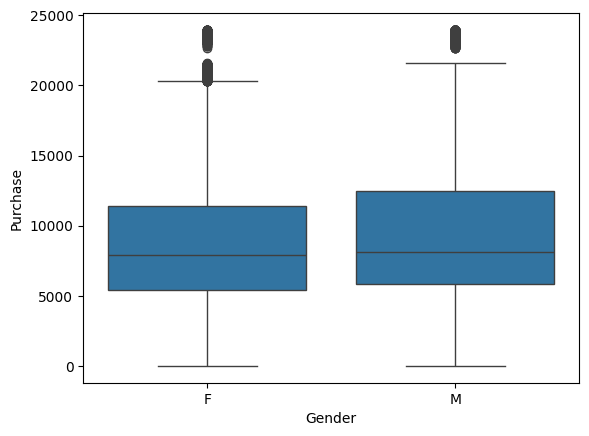

In [ ]:
sns.boxplot(x = 'Gender', y='Purchase', data = walmart_df)

-Male customers are spending more as compared to the female customers.

<Axes: xlabel='Age', ylabel='Purchase'>

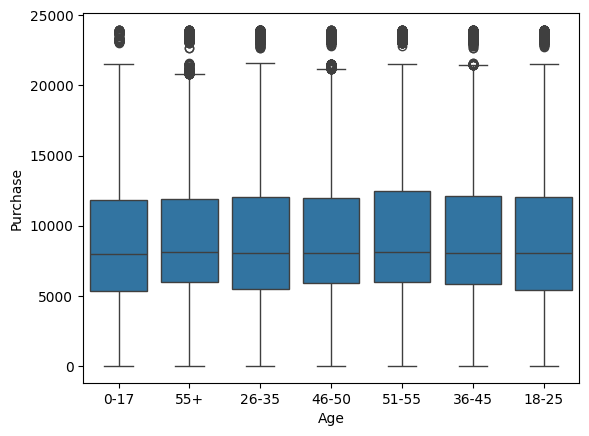

In [ ]:
sns.boxplot(x = 'Age', y='Purchase', data = walmart_df)

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

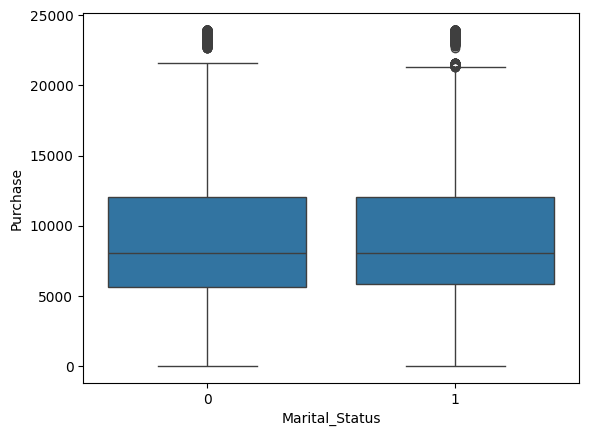

In [ ]:
sns.boxplot(x = 'Marital_Status', y='Purchase', data = walmart_df)

<Axes: ylabel='Occupation'>

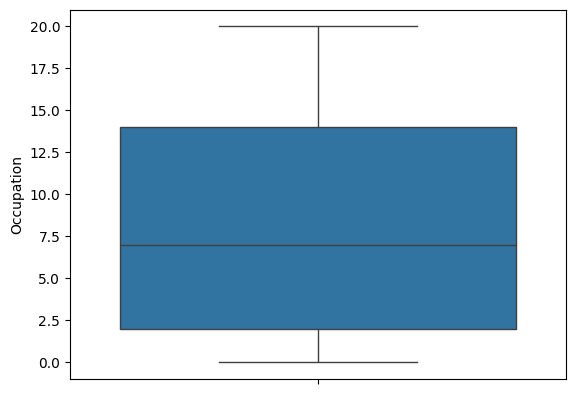

In [ ]:
sns.boxplot( y='Occupation', data = walmart_df)

##OUTLIER DETECTION AND REMOVAL

In [ ]:
p_25 = np.percentile(walmart_df['Purchase'], 25)
p_75 = np.percentile(walmart_df['Purchase'], 75)
iqr_purchase = p_75 - p_25

upper = p_75 + 1.5*(iqr_purchase)
lower = p_25 - 1.5*(iqr_purchase)
lower, upper

(-3523.5, 21400.5)

In [ ]:
#outlier percentage

(len(walmart_df[walmart_df['Purchase']>21400.5])*100) / len(walmart_df)

0.4866671029763593

In [ ]:
#As the outlier percentage is 0.4% we can remove them, the lower limit here is -ve so we do not need to remove anythin on lower side.
new_df = walmart_df[walmart_df['Purchase']<=21400.5]
new_df.shape

(547391, 10)

In [ ]:
walmart_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
new_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.473910e+05,547391.000000,547391.000000,547391.000000,547391.000000
mean,1.003028e+06,8.074627,0.409486,5.378945,9195.627195
std,1.727357e+03,6.521586,0.491739,3.927383,4938.872953
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5721.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,8038.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12019.000000
max,1.006040e+06,20.000000,1.000000,20.000000,21399.000000


In [ ]:
new_df.describe(include = ["object", "category"]).T

,count,unique,top,freq
Product_ID,547391,3631,P00265242,1880
Gender,547391,2,M,412171
Age,547391,7,26-35,218661
City_Category,547391,3,B,230114
Stay_In_Current_City_Years,547391,5,1,192845


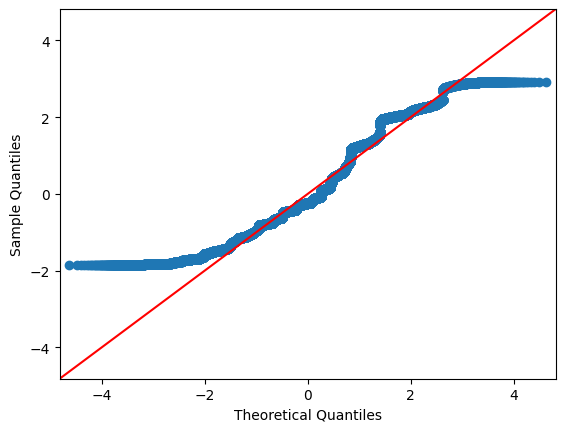

In [ ]:
np.random.seed(0)
qqplot(walmart_df['Purchase'],norm,fit=True,line="45")
plt.show()

In [ ]:
#Male and the female customers count:

new_df.groupby(["Gender"])["User_ID"].nunique() / walmart_df["User_ID"].nunique() * 100

Gender
F    28.280428
M    71.719572
Name: User_ID, dtype: float64

(array([ 33395.,  50447.,  87439., 126926.,  73033.,  54546.,  13748.,
         65871.,  14231.,  27755.]),
 array([1.20000e+01, 2.15070e+03, 4.28940e+03, 6.42810e+03, 8.56680e+03,
        1.07055e+04, 1.28442e+04, 1.49829e+04, 1.71216e+04, 1.92603e+04,
        2.13990e+04]),
 <BarContainer object of 10 artists>)

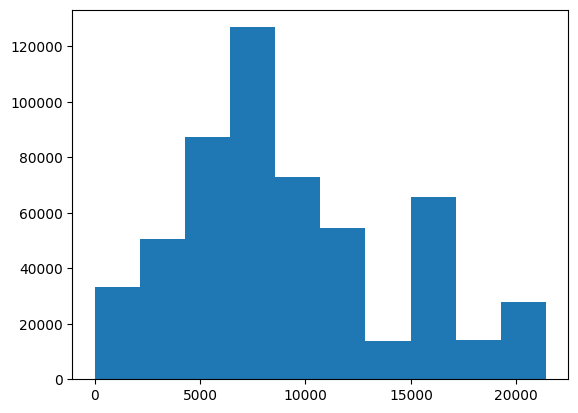

In [ ]:
plt.hist(x = new_df['Purchase'])

###As the Purchase distribution is not normal, we can use the concept of Central Limit Theorem (Using Bootstrapping) and then try to come up with the single point average Purchase amount per transaction

(array([  29.,  190.,  723., 1741., 2694., 2509., 1429.,  551.,  107.,
          27.]),
 array([ 7501.5  ,  7849.884,  8198.268,  8546.652,  8895.036,  9243.42 ,
         9591.804,  9940.188, 10288.572, 10636.956, 10985.34 ]),
 <BarContainer object of 10 artists>)

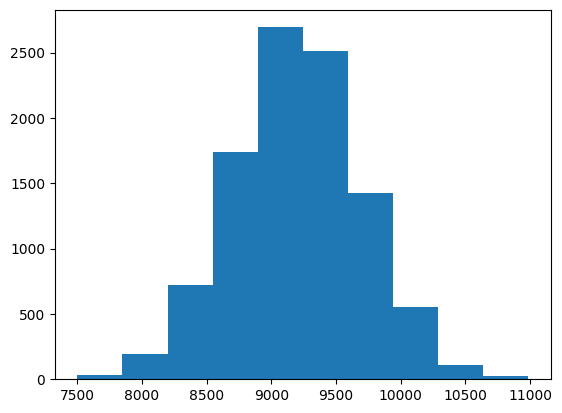

In [ ]:
popln_means_data = []
for i in range(10000):
    sampl = np.random.choice(new_df['Purchase'], size = 100)
    sample_mean = np.mean(sampl)
    popln_means_data.append(sample_mean)


#Calculate mean and standard deviation
mean_sampl = np.mean(popln_means_data)
std_sampl = np.std(popln_means_data)

plt.hist(x = popln_means_data)


In [ ]:
print("Average Purchase amount = ", np.round(mean_sampl,2))

Average Purchase amount =  9197.24


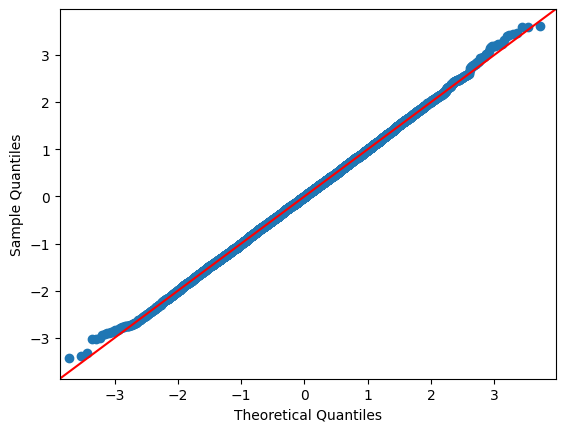

In [ ]:
qqplot(np.array(popln_means_data),norm,fit=True,line="45")
plt.show()

##CALCULATING  90%, 95%, AND  99% CONFIDENCE INTERVAL USING BOOTSTRAPPING FOR PURCHASES BASED ON GENDER - I.E. FOR MALE AND FEMALE CUSTOMERS

In [ ]:
import random
random.seed(10)

In [ ]:
avg_purchase_by_gender = new_df.groupby('Gender')['Purchase'].mean().reset_index()
avg_purchase_by_gender

,Gender,Purchase
0,F,8671.049039
1,M,9367.724355


In [ ]:
new_df.groupby('Gender')['Purchase'].describe().T

Gender,F,M
count,135220.000000,412171.000000
mean,8671.049039,9367.724355
std,4679.058483,5009.234088
min,12.000000,12.000000
25%,5429.000000,5852.000000
50%,7906.000000,8089.000000
75%,11064.000000,12247.000000
max,21398.000000,21399.000000


In [ ]:
temp = new_df.groupby('Gender')['Purchase'].agg(['sum','count']).reset_index()

#calculationg per purchase amount
temp['per_purchase_amount'] = round(temp['sum']/temp['count'])

#renaming the gender
temp['Gender'] = temp['Gender'].replace({'F':'Female','M':'Male'})

temp

,Gender,sum,count,sum_in_billions,per_purchase_amount
0,Female,1172499251,135220,1.17,8671.0
1,Male,3861104315,412171,3.86,9368.0


In [ ]:
def getSampleCI(conf_level, variable, category, df):
  val1 = ((100 - conf_level)/2)/100
  z1 = norm.ppf(val1)
  z2 = norm.ppf(1- val1)
  means_data = []

  sample_size = [500,1000,5000,10000]
  bootstrap_sample_count = 10000
  data = df[df[variable] == category]['Purchase']
  for s_size in sample_size:
      for i in range(bootstrap_sample_count):
        sampl = np.random.choice(data, size = s_size)
        sample_mean = np.mean(sampl)
        means_data.append(sample_mean)


      #Calculate mean and standard deviation
      mean_sampl = np.mean(means_data)
      std_sampl = np.std(means_data)


      #Calculate margin of error
      margin_of_error  =  np.round(z2,2)*(std_sampl/np.sqrt(s_size))

      #Calculate Lower an Upper Limit
      CI_lower = np.round((mean_sampl-margin_of_error),2)
      CI_upper = np.round((mean_sampl+margin_of_error),2)

      print("Sampl : CI(",conf_level,",",s_size,")",variable, "- ", category, " : ", "(", CI_lower, ",", CI_upper,")", ", Width: ",np.round((CI_upper-CI_lower),2))


In [ ]:
def getPopulationCI(conf_level, variable, category, df):
  val1 = ((100 - conf_level)/2)/100
  z1 = norm.ppf(val1)
  z2 = norm.ppf(1- val1)
  means_data = []

  sample_size = [500,1000,5000,10000]
  bootstrap_sample_count = 10000
  data = df[df[variable] == category]['Purchase']

  #Calculate mean and standard deviation
  mean_sampl = np.mean(data)
  std_sampl = np.std(data)

  #Calculate margin of error
  margin_of_error  =  np.round(z2,2)*(std_sampl/np.sqrt(len(data)))

  CI_lower = np.round((mean_sampl-margin_of_error),2)
  CI_upper = np.round((mean_sampl+margin_of_error),2)

  print("Populn : CI(",conf_level,")",variable, "- ", category, " : ", "(", CI_lower, ",", CI_upper,")", ", Width: ",np.round((CI_upper-CI_lower),2))

In [ ]:
getPopulationCI(90, 'Gender','M', new_df)
getSampleCI(90, 'Gender','M', new_df)

Populn : CI( 90 ) Gender -  M  :  ( 9354.93 , 9380.52 ) , Width:  25.59
Sampl : CI( 90 , 500 ) Gender -  M  :  ( 9353.07 , 9385.83 ) , Width:  32.76
Sampl : CI( 90 , 1000 ) Gender -  M  :  ( 9357.9 , 9378.02 ) , Width:  20.12
Sampl : CI( 90 , 5000 ) Gender -  M  :  ( 9364.11 , 9371.7 ) , Width:  7.59
Sampl : CI( 90 , 10000 ) Gender -  M  :  ( 9365.53 , 9370.25 ) , Width:  4.72


In [ ]:
getPopulationCI(90, 'Gender','F', new_df)
getSampleCI(90, 'Gender','F', new_df)

Populn : CI( 90 ) Gender -  F  :  ( 8650.18 , 8691.92 ) , Width:  41.74
Sampl : CI( 90 , 500 ) Gender -  F  :  ( 8657.73 , 8688.33 ) , Width:  30.6
Sampl : CI( 90 , 1000 ) Gender -  F  :  ( 8663.01 , 8681.78 ) , Width:  18.77
Sampl : CI( 90 , 5000 ) Gender -  F  :  ( 8668.48 , 8675.57 ) , Width:  7.09
Sampl : CI( 90 , 10000 ) Gender -  F  :  ( 8669.49 , 8673.89 ) , Width:  4.4


In [ ]:
getPopulationCI(95, 'Gender','M', new_df)
getSampleCI(95, 'Gender','M', new_df)

Populn : CI( 95 ) Gender -  M  :  ( 9352.43 , 9383.02 ) , Width:  30.59
Sampl : CI( 95 , 500 ) Gender -  M  :  ( 9348.06 , 9387.25 ) , Width:  39.19
Sampl : CI( 95 , 1000 ) Gender -  M  :  ( 9355.22 , 9379.19 ) , Width:  23.97
Sampl : CI( 95 , 5000 ) Gender -  M  :  ( 9362.89 , 9371.94 ) , Width:  9.05
Sampl : CI( 95 , 10000 ) Gender -  M  :  ( 9364.33 , 9369.96 ) , Width:  5.63


In [ ]:
getPopulationCI(95, 'Gender','F', new_df)
getSampleCI(95, 'Gender','F', new_df)

Populn : CI( 95 ) Gender -  F  :  ( 8646.11 , 8695.99 ) , Width:  49.88
Sampl : CI( 95 , 500 ) Gender -  F  :  ( 8652.23 , 8688.83 ) , Width:  36.6
Sampl : CI( 95 , 1000 ) Gender -  F  :  ( 8659.72 , 8682.14 ) , Width:  22.42
Sampl : CI( 95 , 5000 ) Gender -  F  :  ( 8667.18 , 8675.65 ) , Width:  8.47
Sampl : CI( 95 , 10000 ) Gender -  F  :  ( 8668.59 , 8673.85 ) , Width:  5.26


In [ ]:
getPopulationCI(99, 'Gender','M', new_df)
getSampleCI(99, 'Gender','M', new_df)

Populn : CI( 99 ) Gender -  M  :  ( 9347.59 , 9387.85 ) , Width:  40.26
Sampl : CI( 99 , 500 ) Gender -  M  :  ( 9346.56 , 9398.71 ) , Width:  52.15
Sampl : CI( 99 , 1000 ) Gender -  M  :  ( 9354.31 , 9386.15 ) , Width:  31.84
Sampl : CI( 99 , 5000 ) Gender -  M  :  ( 9363.63 , 9375.64 ) , Width:  12.01
Sampl : CI( 99 , 10000 ) Gender -  M  :  ( 9365.32 , 9372.79 ) , Width:  7.47


In [ ]:
getPopulationCI(99, 'Gender','F', new_df)
getSampleCI(99, 'Gender','F', new_df)

Populn : CI( 99 ) Gender -  F  :  ( 8638.22 , 8703.88 ) , Width:  65.66
Sampl : CI( 99 , 500 ) Gender -  F  :  ( 8649.58 , 8697.71 ) , Width:  48.13
Sampl : CI( 99 , 1000 ) Gender -  F  :  ( 8658.06 , 8687.6 ) , Width:  29.54
Sampl : CI( 99 , 5000 ) Gender -  F  :  ( 8666.7 , 8677.84 ) , Width:  11.14
Sampl : CI( 99 , 10000 ) Gender -  F  :  ( 8668.39 , 8675.32 ) , Width:  6.93


##ANALYSIS BASED ON MARRIED VS UNMARRIED
- We consider 0 as Unmarried and 1 as married.

In [ ]:
new_df['Marital_Status'].value_counts()

Marital_Status
0    323242
1    224149
Name: count, dtype: int64

In [ ]:
getPopulationCI(90, 'Marital_Status',0, new_df)
getSampleCI(90, 'Marital_Status',0, new_df)

Populn : CI( 90 ) Marital_Status -  0  :  ( 9187.31 , 9215.86 ) , Width:  28.55
Sampl : CI( 90 , 500 ) Marital_Status -  0  :  ( 9185.55 , 9218.17 ) , Width:  32.62
Sampl : CI( 90 , 1000 ) Marital_Status -  0  :  ( 9192.18 , 9212.14 ) , Width:  19.96
Sampl : CI( 90 , 5000 ) Marital_Status -  0  :  ( 9198.04 , 9205.55 ) , Width:  7.51
Sampl : CI( 90 , 10000 ) Marital_Status -  0  :  ( 9199.44 , 9204.12 ) , Width:  4.68


In [ ]:
getPopulationCI(90, 'Marital_Status',1, new_df)
getSampleCI(90, 'Marital_Status',1, new_df)

Populn : CI( 90 ) Marital_Status -  1  :  ( 9169.98 , 9204.1 ) , Width:  34.12
Sampl : CI( 90 , 500 ) Marital_Status -  1  :  ( 9167.57 , 9199.59 ) , Width:  32.02
Sampl : CI( 90 , 1000 ) Marital_Status -  1  :  ( 9175.86 , 9195.42 ) , Width:  19.56
Sampl : CI( 90 , 5000 ) Marital_Status -  1  :  ( 9182.42 , 9189.8 ) , Width:  7.38
Sampl : CI( 90 , 10000 ) Marital_Status -  1  :  ( 9183.89 , 9188.48 ) , Width:  4.59


In [ ]:
getPopulationCI(95, 'Marital_Status',0, new_df)
getSampleCI(95, 'Marital_Status',0, new_df)

Populn : CI( 95 ) Marital_Status -  0  :  ( 9184.52 , 9218.64 ) , Width:  34.12
Sampl : CI( 95 , 500 ) Marital_Status -  0  :  ( 9182.17 , 9221.36 ) , Width:  39.19
Sampl : CI( 95 , 1000 ) Marital_Status -  0  :  ( 9189.73 , 9213.63 ) , Width:  23.9
Sampl : CI( 95 , 5000 ) Marital_Status -  0  :  ( 9196.86 , 9205.87 ) , Width:  9.01
Sampl : CI( 95 , 10000 ) Marital_Status -  0  :  ( 9198.81 , 9204.41 ) , Width:  5.6


In [ ]:
getPopulationCI(95, 'Marital_Status',1, new_df)
getSampleCI(95, 'Marital_Status',1, new_df)

Populn : CI( 95 ) Marital_Status -  1  :  ( 9166.65 , 9207.43 ) , Width:  40.78
Sampl : CI( 95 , 500 ) Marital_Status -  1  :  ( 9166.87 , 9205.18 ) , Width:  38.31
Sampl : CI( 95 , 1000 ) Marital_Status -  1  :  ( 9175.09 , 9198.65 ) , Width:  23.56
Sampl : CI( 95 , 5000 ) Marital_Status -  1  :  ( 9182.34 , 9191.23 ) , Width:  8.89
Sampl : CI( 95 , 10000 ) Marital_Status -  1  :  ( 9184.03 , 9189.56 ) , Width:  5.53


In [ ]:
getPopulationCI(99, 'Marital_Status',0, new_df)
getSampleCI(99, 'Marital_Status',0, new_df)

Populn : CI( 99 ) Marital_Status -  0  :  ( 9179.13 , 9224.04 ) , Width:  44.91
Sampl : CI( 99 , 500 ) Marital_Status -  0  :  ( 9178.92 , 9230.39 ) , Width:  51.47
Sampl : CI( 99 , 1000 ) Marital_Status -  0  :  ( 9186.32 , 9217.68 ) , Width:  31.36
Sampl : CI( 99 , 5000 ) Marital_Status -  0  :  ( 9196.13 , 9207.96 ) , Width:  11.83
Sampl : CI( 99 , 10000 ) Marital_Status -  0  :  ( 9198.29 , 9205.65 ) , Width:  7.36


In [ ]:
getPopulationCI(99, 'Marital_Status',1, new_df)
getSampleCI(99, 'Marital_Status',1, new_df)

Populn : CI( 99 ) Marital_Status -  1  :  ( 9160.2 , 9213.88 ) , Width:  53.68
Sampl : CI( 99 , 500 ) Marital_Status -  1  :  ( 9157.74 , 9208.45 ) , Width:  50.71
Sampl : CI( 99 , 1000 ) Marital_Status -  1  :  ( 9168.78 , 9199.92 ) , Width:  31.14
Sampl : CI( 99 , 5000 ) Marital_Status -  1  :  ( 9179.35 , 9191.08 ) , Width:  11.73
Sampl : CI( 99 , 10000 ) Marital_Status -  1  :  ( 9181.97 , 9189.27 ) , Width:  7.3


###ANALYSIS BASED ON THE AGE-GROUP

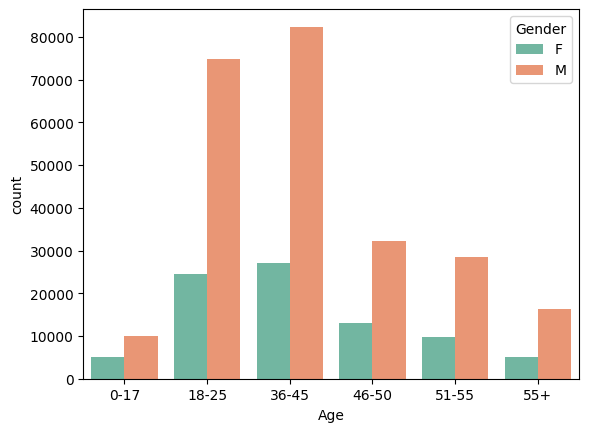

In [ ]:
sns.countplot(data=new_df, x='Age', hue='Gender', palette='Set2', order=['0-17','18-25','36-45','46-50','51-55','55+'])
plt.show()

###We check for the 95% Confidence Interval for all the age groups which is the most commonly used interval.

In [ ]:
getPopulationCI(95, 'Age','0-17', new_df)
getSampleCI(95, 'Age','0-17', new_df)

Populn : CI( 95 ) Age -  0-17  :  ( 8787.04 , 8947.86 ) , Width:  160.82
Sampl : CI( 95 , 500 ) Age -  0-17  :  ( 8846.24 , 8885.23 ) , Width:  38.99
Sampl : CI( 95 , 1000 ) Age -  0-17  :  ( 8854.17 , 8878.11 ) , Width:  23.94
Sampl : CI( 95 , 5000 ) Age -  0-17  :  ( 8862.01 , 8871.04 ) , Width:  9.03
Sampl : CI( 95 , 10000 ) Age -  0-17  :  ( 8863.85 , 8869.47 ) , Width:  5.62


In [ ]:
getPopulationCI(95, 'Age','18-25', new_df)
getSampleCI(95, 'Age','18-25', new_df)

Populn : CI( 95 ) Age -  18-25  :  ( 9093.07 , 9154.99 ) , Width:  61.92
Sampl : CI( 95 , 500 ) Age -  18-25  :  ( 9104.07 , 9143.24 ) , Width:  39.17
Sampl : CI( 95 , 1000 ) Age -  18-25  :  ( 9111.05 , 9134.98 ) , Width:  23.93
Sampl : CI( 95 , 5000 ) Age -  18-25  :  ( 9119.21 , 9128.23 ) , Width:  9.02
Sampl : CI( 95 , 10000 ) Age -  18-25  :  ( 9120.75 , 9126.36 ) , Width:  5.61


In [ ]:
getPopulationCI(95, 'Age','36-45', new_df)
getSampleCI(95, 'Age','36-45', new_df)

Populn : CI( 95 ) Age -  36-45  :  ( 9225.0 , 9283.4 ) , Width:  58.4
Sampl : CI( 95 , 500 ) Age -  36-45  :  ( 9234.07 , 9272.35 ) , Width:  38.28
Sampl : CI( 95 , 1000 ) Age -  36-45  :  ( 9241.93 , 9265.47 ) , Width:  23.54
Sampl : CI( 95 , 5000 ) Age -  36-45  :  ( 9249.22 , 9258.1 ) , Width:  8.88
Sampl : CI( 95 , 10000 ) Age -  36-45  :  ( 9250.98 , 9256.51 ) , Width:  5.53


In [ ]:
getPopulationCI(95, 'Age', '46-50', new_df)
getSampleCI(95, 'Age','46-50', new_df)

Populn : CI( 95 ) Age -  46-50  :  ( 9084.23 , 9173.74 ) , Width:  89.51
Sampl : CI( 95 , 500 ) Age -  46-50  :  ( 9111.8 , 9149.82 ) , Width:  38.02
Sampl : CI( 95 , 1000 ) Age -  46-50  :  ( 9118.72 , 9141.98 ) , Width:  23.26
Sampl : CI( 95 , 5000 ) Age -  46-50  :  ( 9125.26 , 9134.04 ) , Width:  8.78
Sampl : CI( 95 , 10000 ) Age -  46-50  :  ( 9126.83 , 9132.29 ) , Width:  5.46


In [ ]:
getPopulationCI(95, 'Age', '51-55', new_df)
getSampleCI(95, 'Age','51-55', new_df)

Populn : CI( 95 ) Age -  51-55  :  ( 9373.44 , 9472.8 ) , Width:  99.36
Sampl : CI( 95 , 500 ) Age -  51-55  :  ( 9401.56 , 9440.29 ) , Width:  38.73
Sampl : CI( 95 , 1000 ) Age -  51-55  :  ( 9409.66 , 9433.34 ) , Width:  23.68
Sampl : CI( 95 , 5000 ) Age -  51-55  :  ( 9417.38 , 9426.32 ) , Width:  8.94
Sampl : CI( 95 , 10000 ) Age -  51-55  :  ( 9419.36 , 9424.91 ) , Width:  5.55


In [ ]:
getPopulationCI(95, 'Age', '55+', new_df)
getSampleCI(95, 'Age','55+', new_df)

Populn : CI( 95 ) Age -  55+  :  ( 9151.4 , 9281.91 ) , Width:  130.51
Sampl : CI( 95 , 500 ) Age -  55+  :  ( 9199.01 , 9236.89 ) , Width:  37.88
Sampl : CI( 95 , 1000 ) Age -  55+  :  ( 9205.81 , 9229.01 ) , Width:  23.2
Sampl : CI( 95 , 5000 ) Age -  55+  :  ( 9212.37 , 9221.13 ) , Width:  8.76
Sampl : CI( 95 , 10000 ) Age -  55+  :  ( 9213.78 , 9219.23 ) , Width:  5.45


## OBSERVATIONS AND INSIGHTS

- The dataset 550068 rows of data with  10 columns.

- There are no null values.

- The 'Purchase' column when analysed(using Interquartile range concept) shows outliers which are removed and a new dataframe is then used for further analysis.

- The other column's outlier data may not be necessarily removed, as the most important column for analysis is the 'Purchase' column.

- The 'Purchase' column distributiuon shows that it is not a normal distibution. When we use the concept on Central Limit Theorem , we get the data that follows the normal distribution.

- There are more number of Male customers as compared to the Female customers.

- Most of the Walmart customers are in the age category 26-35 with least for ages 0-17 and 55 onwards.

- There are more unmarried customers than the married ones.


- The average purchase amount per transaction is slightly higher for male customers than female customers ($9368 vs $8671). The width is wider for males as compared to females .

- For the sample CI , the width reduces as we increase the sample size and the confidence level.

- For a particular category say for Males , as we increase the Confidence Interval the width also increases.

- The Confidence Interval for the Married and the Unmarried customers are overlapping, which suggests that the observed difference may be by chance and are not statistically significant.

- The confidence interval is overlapping for some of the age-groups

#SUGGESTIONS

- Based on the observations for the confidence interval (Gender) women spend less as compared to men. So wlamart can take this opportunity to attract the female customers by coming up with specific offers for them. At the same time we can levergae the fact that male customers are spending more, so we can come up with some offers for male customers also so that they will spend more.


- If we observe the confidence intervals of the married and the unmarried customers, we see that it is not statistically significant. So both the categories of married as well as unmarried customers are important. Walmart can look for marketing efforts for both the set of customers.


- The most significant age group(in terms of count) of the customers is the 36- 45 age group and can be targeted to see how more revenue can be generated through this customer group. If we look at the confidence intervals we find overlap between various age groups, which show that there is no siginificant difference in spending according to the age groups.